In [1]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
uploaded_file_name = "Referencni_skladby/Imanbek & BYOR - Belly Dancer (Official Music Video).wav"

In [3]:
y, sr = librosa.load(uploaded_file_name)
tempo_librosa, beats = librosa.beat.beat_track(y=y, sr=sr)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
times = librosa.times_like(onset_env, sr=sr, hop_length=512)
beats = times[beats]
times

array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       1.53483900e+02, 1.53507120e+02, 1.53530340e+02])

In [4]:
beats_stength = np.ones(len(beats))

In [5]:
i = 0
for beat in beats:
    try:
        index = np.where(times == beat)[0]
        beats_stength[i] = onset_env[index][0]
    except ValueError:
        beats_stength[i] = 0
    i += 1

In [6]:
beats_stength = librosa.util.normalize(beats_stength)

In [7]:
beats = np.expand_dims(beats, axis=0)
beats =np.vstack((beats,beats_stength))

TypeError: 'Axes' object is not subscriptable

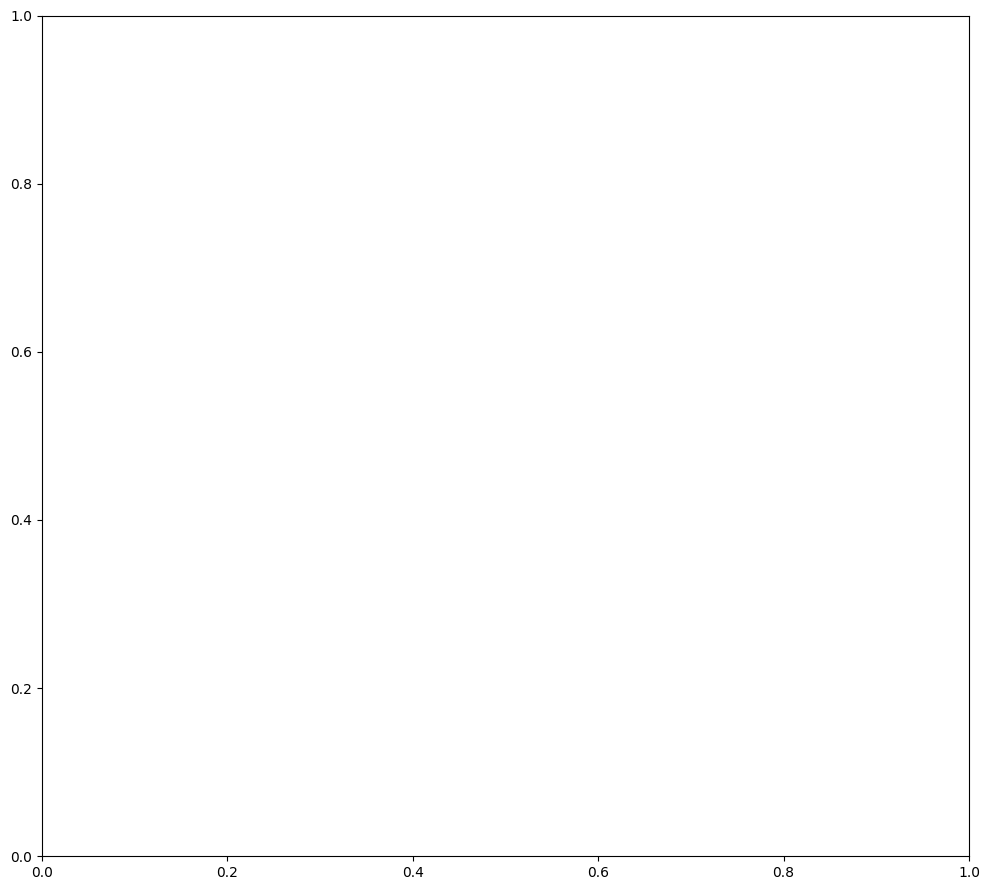

In [9]:
xmin_time = 55 # Čas skladby, oa kterého se vykreslí grafy.
xmax_time = 65 # Čas skladby, do kterého se vykreslí grafy.
fig, ax = plt.subplots(1,1, figsize=(10,9))
fig.tight_layout()
fig.subplots_adjust(hspace = 0.6 )

ax.plot(times, beats_stength)
ax.vlines(librosa[0], 0, 1, alpha=0.5, color='r',
        linestyle='--')
ax.set_xlim(xmin=xmin_time, xmax=xmax_time)
ax.set_title('b)', x=-0.08,y=0.5)